# 1-1 Read nwb file

In [3]:
import h5py
import scipy.io as scio
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# data from .nwb
fnwb = h5py.File('indy_20161017_02.nwb', 'r')

fs = 24414.0625
channel = 96
data = np.array(fnwb['acquisition']['timeseries']['broadband']['data']).T
length = len(data[0])
duration = length/fs
print('data-information: \n shape: ' + str(data.shape) + '\n duration: '+  str(duration) + '\n sample_rate: '+ str(fs))
t = np.arange(0,length) / fs

#CAR
ref = np.zeros(length)
for i in range(channel):
    ref += data[i]

ref = ref / channel

data-information: 
 shape: (96, 12597793)
 duration: 516.00560128
 sample_rate: 24414.0625


In [5]:
#data from .mat
fmat = h5py.File('indy_20161017_02.mat', 'r')
finger_pos = np.array(fmat['finger_pos'])
ffs = finger_pos.shape[1]/duration
ft = np.arange(0,len(finger_pos[1])) / ffs
fxv = (finger_pos[1][1:-1] - finger_pos[1][0:-2])*ffs
fyv = (finger_pos[2][1:-1] - finger_pos[2][0:-2])*ffs
print('data-information: \n shape: ' + str(finger_pos.shape) + '\n duration: '+  str(duration) + '\n sample_rate: '+ str(ffs))

data-information: 
 shape: (3, 123959)
 duration: 516.00560128
 sample_rate: 240.228012433408


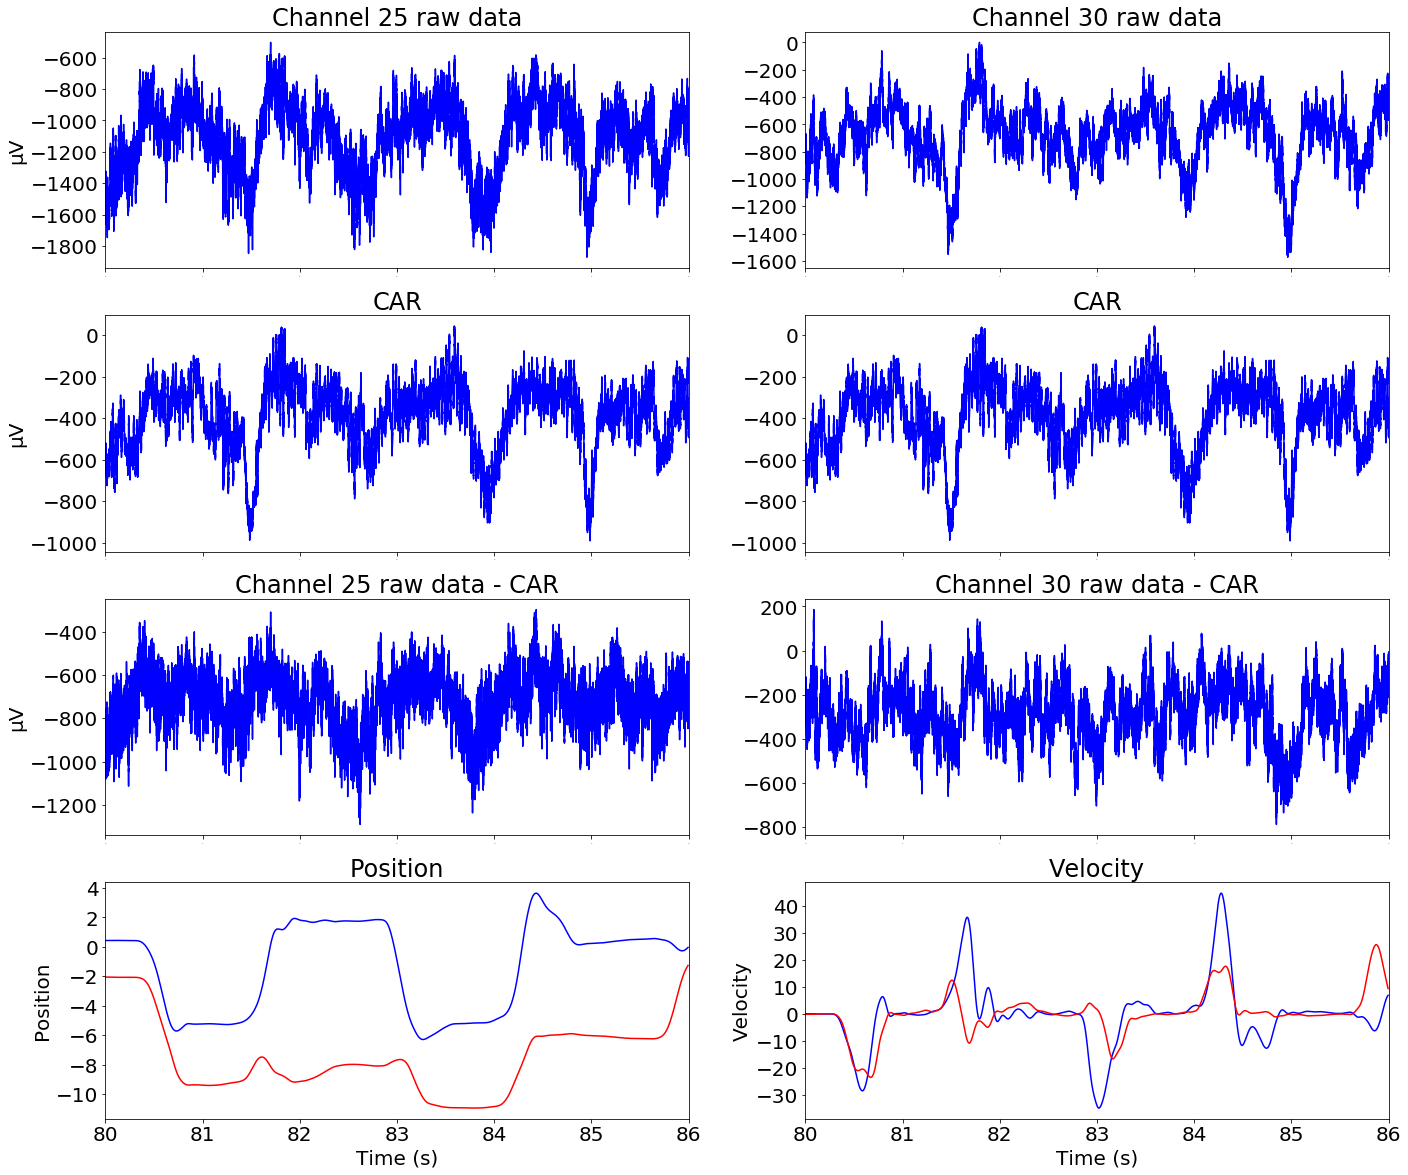

In [82]:
#Plot
sL = [int(80*fs), int(80*fs), int(80*fs), int(80*fs), int(80*fs), int(80*fs), int(80*ffs), int(80*ffs)]
eL = [int(86*fs), int(86*fs), int(86*fs), int(86*fs), int(86*fs), int(86*fs), int(86*ffs), int(86*ffs)] 
xL = [t, t, t, t, t, t, [ft, ft], [ft,ft]]
yL = [data[25-1], data[30-1], ref, ref, data[25-1]-ref, data[30-1]-ref, [finger_pos[1],finger_pos[2]], [fxv ,fyv]]
ylabelL = ['μV', '', 'μV', '', 'μV', '', 'Position', 'Velocity']
fsizeL = [0, 0, 0, 0, 0, 0, 20, 20]
titL = ['Channel 25 raw data', 'Channel 30 raw data', 'CAR', 'CAR', 'Channel 25 raw data - CAR', 'Channel 30 raw data - CAR', 'Position', 'Velocity']

colorL = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', ['blue', 'red'], ['blue', 'red']]

fig = plt.figure(figsize=(23,20))
ax = []
for i, fsize in zip(range(8), fsizeL):
    ax.append(fig.add_subplot(4,2,i+1))
    plt.xticks(fontsize=fsize)
    plt.yticks(fontsize=20)
    
for [i, s, e, x, y, tit, fsize, col, ylab] in zip(range(8), sL, eL, xL, yL, titL, fsizeL, colorL, ylabelL):
    ax[i].set_title(tit, fontsize=24)
    if type(x) == list:
        for ii in range(len(x)):
            ax[i].plot(x[ii][s:e], y[ii][s:e], color = col[ii])
    else:
        ax[i].plot(x[s:e], y[s:e], color = col)
    ax[i].set_xlim(80, 86)
    ax[i].set_ylabel(ylab, fontsize = 20)

ax[6].set_xlabel('Time (s)', fontsize = 20)
ax[7].set_xlabel('Time (s)', fontsize = 20)
plt.show()